# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [184]:
# Import the appropriate libraries with aliases
import pandas as pd
# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")
north_df.head()
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [187]:
#Code Used:

north_df.nunique()

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [189]:
#Code Used:

south_df.nunique()

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [191]:
#Code Used:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [193]:
#Code Used:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [195]:
# Code Used:
a=north_df.groupby("Time Block").sum(numeric_only=True)



In [197]:
# Code Used:

b=south_df.groupby("Time Block").sum(numeric_only=True)
print (a+b)

            Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Time Block                                                                      
10:00 AM         10665          4          4           994                194   
11:00 AM          6796          2          1           565                100   
12:00 PM         17020          3          1          1202                225   
1:00 PM           5363          1          0           399                 75   
2:00 PM           9957          0          1           643                124   
3:00 PM          11674          0          1           736                132   
4:00 PM           8743          0          1           528                109   
5:00 PM           8031          2          0           437                 90   
9:00 AM            782          4          2           100                 20   

            Incoming Wait Time  During Call Wait Time  Calls  
Time Block                                   

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 0
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 43
> - 5:00PM   = 10



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes, incoming wait time- I would add 0 in the the code, since those probably mean 0 wait time.

In [205]:
# Code Used
north_df.info()
south_df.info()
# Add Additional Cells as needed.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [207]:
north_df["Incoming Wait Time"].fillna(0, inplace=True)
south_df["Incoming Wait Time"].fillna(0, inplace=True)
north_df.info

<bound method DataFrame.info of      Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I did not see this in the dataset when I looked at it, but the below is the code I would use in this instance, and replace "Yesyes" with "yes"

In [209]:
#Code Used
# Add Additional Cells as needed.

north_df['Sale'].replace({"YESYES":"YES"})
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No duplicates- see code below.

In [211]:
#Code Used
duplicates=north_df[north_df.duplicated()]
duplicates.head()
duplicates2=south_df[south_df.duplicated()]
duplicates2.head()
# Add Additional Cells as needed.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Yes, a few of the columns are unneeded, either don't know what they represent, or not valuble for data analysis

In [213]:
#Code Used
# Add Additional Cells as needed.
new_ndf=north_df.drop(['Unnamed: 0','Call Purpose', 'Queue', 'Calls'], axis=1)
new_sdf=south_df.drop(['Unnamed: 0','Call Purpose', 'Queue', 'Calls'], axis=1)
new_ndf
new_sdf

,Branch,Time Block,Incoming or Outgoing,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,South,10:00 AM,Incoming,Kate,NO,0,0,9,1,1.0,2
1,South,10:00 AM,Incoming,Eric,NO,0,0,8,2,1.0,4
2,South,10:00 AM,Incoming,Susan,NO,0,0,10,2,1.0,4
3,South,10:00 AM,Incoming,Alice,NO,0,0,12,1,1.0,3
4,South,12:00 PM,Incoming,Sandy,NO,0,0,8,3,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
309,South,5:00 PM,Outgoing,Helga,NO,0,0,10,3,0.0,4
310,South,5:00 PM,Outgoing,Susan,NO,0,0,12,3,0.0,4
311,South,5:00 PM,Outgoing,Sandy,NO,0,0,9,3,0.0,4
312,South,5:00 PM,Outgoing,Eric,NO,0,0,10,1,0.0,2


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [215]:
# Create dataframe for the entire company named df

df=pd.concat([north_df,south_df], axis=0)
df.shape

(559, 15)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Xander 27
- South Branch = Sharon 27


In [217]:
# Code Used
# Add Additional Cells as needed.
n_branch=north_df.groupby("Rep ID")
n_branch.first()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Amanda,11,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
Andy,17,North,Complaint,2:00 PM,Incoming,A,NO,0,1,9,3,2.0,4,1
Brent,0,North,Complaint,9:00 AM,Incoming,B,NO,0,1,9,2,1.0,4,1
Cam,1,North,Sales Support,11:00 AM,Incoming,A,NO,0,0,11,1,1.0,3,1
Duke,5,North,Product Support,2:00 PM,Incoming,B,NO,0,0,12,2,1.0,2,1
Joe,6,North,Product Support,2:00 PM,Incoming,A,NO,0,0,8,1,1.0,3,1
Lilly,7,North,Product Support,2:00 PM,Incoming,B,NO,0,0,11,2,1.0,3,1
Todd,2,North,Sales Support,11:00 AM,Incoming,B,NO,0,0,9,3,1.0,3,1
Xander,27,North,Product Support,3:00 PM,Incoming,B,NO,0,0,12,1,2.0,4,1


In [219]:
s_branch=south_df.groupby("Rep ID")
s_branch.first()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Alice,3,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,12,1,1.0,3,1
Eric,1,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,8,2,1.0,4,1
George,9,South,Product Support,3:00 PM,Incoming,D,NO,0,0,8,3,1.0,4,1
Helga,10,South,Product Support,3:00 PM,Incoming,D,NO,0,0,9,1,1.0,3,1
Josh,11,South,Product Support,4:00 PM,Incoming,D,NO,0,0,11,3,1.0,3,1
Karl,5,South,Sales Support,1:00 PM,Incoming,D,NO,0,0,9,1,1.0,4,1
Kate,0,South,Sales Support,10:00 AM,Incoming,D,NO,0,0,9,1,1.0,2,1
Randy,8,South,Product Support,2:00 PM,Incoming,D,NO,0,0,11,2,1.0,4,1
Sandy,4,South,Sales Support,12:00 PM,Incoming,C,NO,0,0,8,3,1.0,3,1


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide =1.97
- Do any of these fall out of the optimal range of 2-5%? Yes, but it is lower than 2-5% so I am not too concerned (shows the branch has less people abandoning calls

In [174]:
# Code Used
# Add Additional Cells as needed.
abandon_n=north_df.groupby("Abandoned")
table=abandon_n.describe()
table



Unnamed: 0                                                           \
               count        mean        std  min    25%    50%     75%    max   
Abandoned                                                                       
0              238.0  123.852941  70.806739  1.0  62.25  125.5  184.75  244.0   
1                7.0   59.000000  38.008771  0.0  31.50   86.0   87.50   89.0   

          Lost Call            ... During Call Wait Time       Calls       \
              count      mean  ...                   75%  max  count mean   
Abandoned                      ...                                          
0             238.0  0.021008  ...                   4.0  4.0  238.0  1.0   
1               7.0  0.000000  ...                   4.0  4.0    7.0  1.0   

                                         
           std  min  25%  50%  75%  max  
Abandoned                                
0          0.0  1.0  1.0  1.0  1.0  1.0  
1          0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 56 columns]

In [221]:
abandon_s=south_df.groupby("Abandoned")
abandon_s.describe()
sum=(4/314)*100
sum

Unnamed: 0                                                      \
               count        mean        std   min     25%    50%     75%   
Abandoned                                                                  
0              310.0  156.945161  91.240606   0.0   78.25  158.5  235.75   
1                4.0  122.000000  30.011109  77.0  121.25  136.5  137.25   

                 Lost Call            ... During Call Wait Time       Calls  \
             max     count      mean  ...                   75%  max  count   
Abandoned                             ...                                     
0          313.0     310.0  0.035484  ...                   4.0  4.0  310.0   
1          138.0       4.0  0.000000  ...                   4.0  4.0    4.0   

                                              
          mean  std  min  25%  50%  75%  max  
Abandoned                                     
0          1.0  0.0  1.0  1.0  1.0  1.0  1.0  
1          1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 56 columns]

In [146]:
abandon_t=df.groupby("Abandoned")
abandon_t.describe()
sum=(11/(11+548))*100
sum

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.0
- South Branch = 75.16
- Company Wide = 77.28

In [24]:
# Code Used
# Add Additional Cells as needed.


In [223]:
# Code Used
# Add Additional Cells as needed.
quickcalls_north=north_df[north_df["Incoming Wait Time"]<=2.0]
count=(quickcalls_north["Calls"].count()/north_df['Calls'].count())*100
count

80.0

In [150]:
quickcalls_south=south_df[south_df["Incoming Wait Time"]<=2.0]
count=(quickcalls_south["Calls"].count()/south_df["Calls"].count())*100
count

75.15923566878982

In [152]:
quickcalls=df[df["Incoming Wait Time"]<=2.0]
count=(quickcalls["Calls"].count()/df["Calls"].count())*100
count

77.28085867620752

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02
- South Branch in seconds = 1.20
- Company Wide in seconds = 1.12


In [225]:
# Code Used 
north_df["Incoming Wait Time"].agg("mean")
#avg_speedn=df_north["Incoming Wait Time"].mean()

1.0204081632653061

In [227]:
south_df["Incoming Wait Time"].agg("mean")

1.2038216560509554

In [229]:
df["Incoming Wait Time"].agg("mean")

1.1234347048300537

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: Bar chart because you are just comparing different queues.

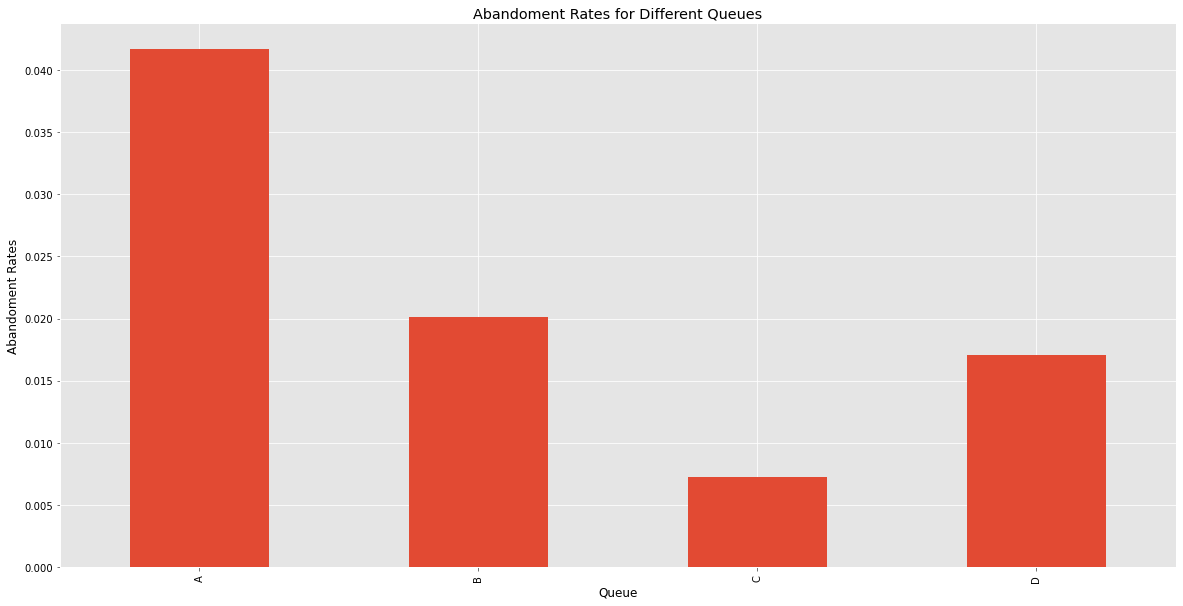

In [ ]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
queue_dict
abandonment_rates
#Your Code Here:

# Vertical
#style.use('ggplot')

df_tot = pd.DataFrame(abandonment_rates.values(), abandonment_rates.keys())
df_tot
df_tot.plot(kind = 'bar', legend = False)
plt.title('Abandoment Rates for Different Queues',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Abandoment Rates',color = 'black')
#plt.savefig('bar_vertical.png')

plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why:  grouped bar chart because you are comparing different reps.

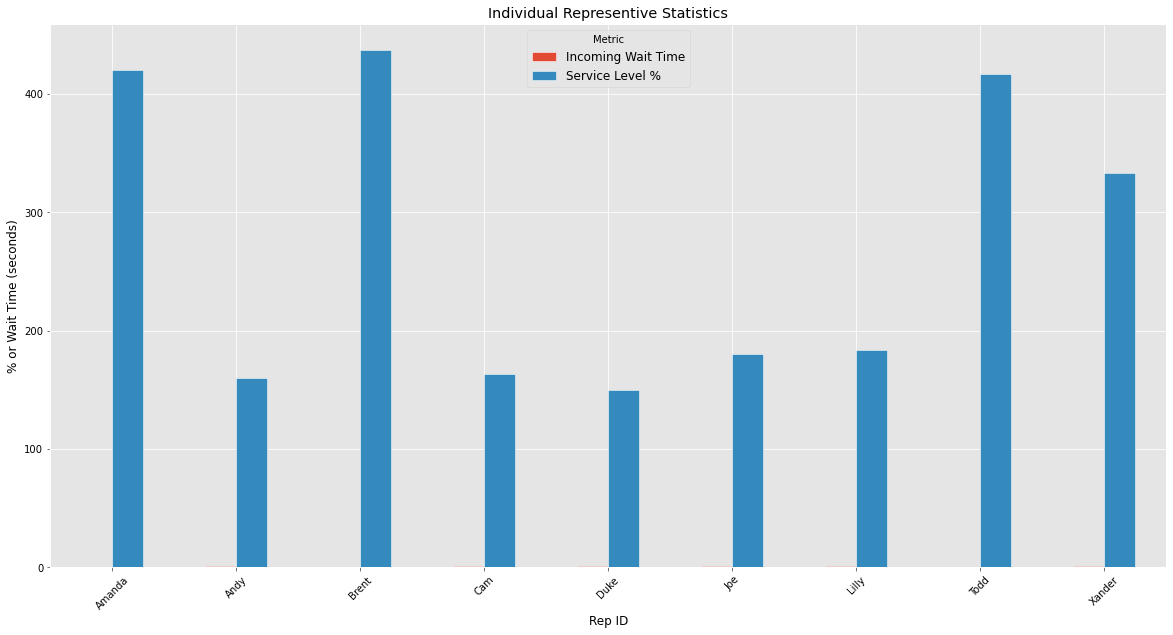

In [82]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

df_group = pd.merge(north_plt, service_level, on="Rep ID")
df_group.drop("Calls_x", axis=1, inplace=True)
df_group.drop("Calls_y", axis=1, inplace=True)
df_group
df_group.plot.bar("Rep ID",edgecolor = 'white')
plt.title('Individual Representive Statistics',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.xticks(rotation=45)
plt.ylabel('% or Wait Time (seconds)',color = 'black')
plt.legend(title = 'Metric', fontsize = 12)
#plt.savefig('bar_grouped.png')

#plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

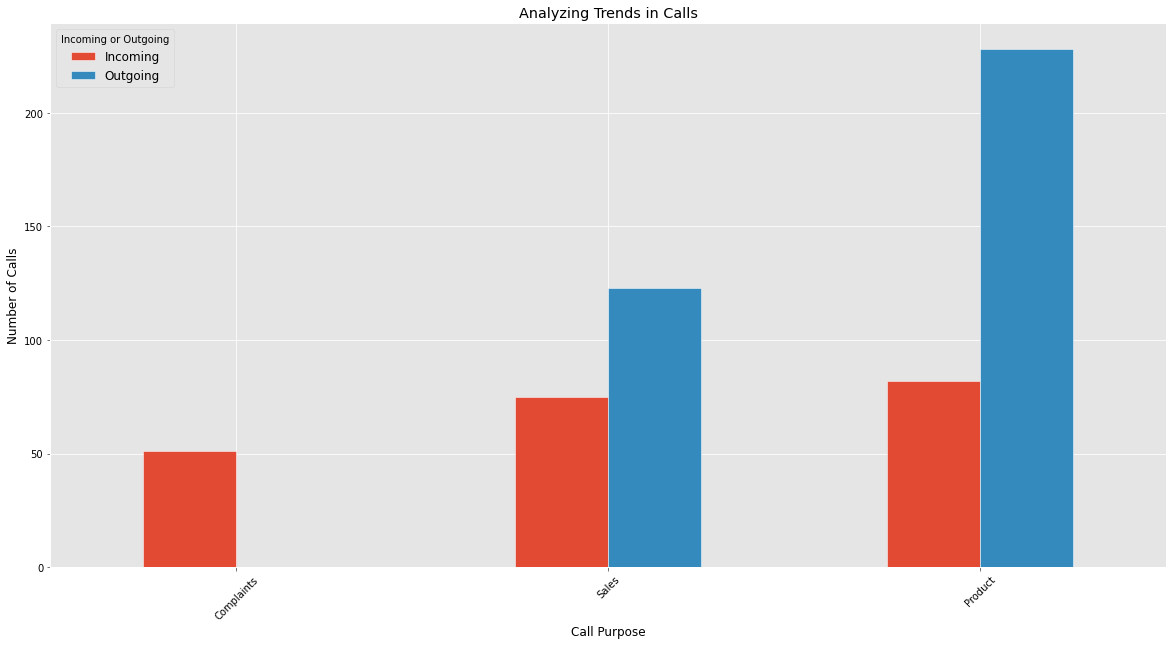

In [84]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
Incoming1 = {key: complaints[key] for key in complaints.keys()
       & {'Incoming'}}
Incoming2 = {key: sales_support[key] for key in sales_support.keys()
       & {'Incoming'}}
Incoming3 = {key: product_support[key] for key in product_support.keys()
       & {'Incoming'}}
df_com=pd.DataFrame({'Complaints':complaints.values()}, complaints.keys())
#df_com.loc[len(df_com.index)] = [0]
df_com.loc["Outgoing"]=[0]
df_sales=pd.DataFrame({"Sales":sales_support.values()},sales_support.keys())
df_prod=pd.DataFrame({"Product":product_support.values()}, product_support.keys())
df_com
df_all=pd.concat([df_com, df_sales,df_prod], axis=1)
df_all.T
df_all.T.plot.bar( edgecolor='white')
plt.title('Analyzing Trends in Calls',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Call Purpose',color = 'black')
plt.xticks(rotation=45)
plt.ylabel('Number of Calls',color = 'black')
plt.legend(title = 'Incoming or Outgoing', fontsize = 12)
#plt.savefig('bar_grouped.png')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South Branch is operating more efficiently, as the average abandoment rate is lower, the average speed of answer is lower, and the service level (amount of calls answered in under 2 seconds) is higher.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
The south branch has more representives and works more quickly (answers calls quicker, less abandoned calls), so would benefit from the extra help (has two additional reps compared to the north branch, so maybe transferring one over would help).

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
More data for the individual representatives would be helpful to be able to recognize high performers and provide training for lower performers to increase overall barnch efficiency.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: